In [69]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
a = np.array([1,2,3])
print(np.argmax(a))

2


Обозначим $ x_k = x_0 + k h, k \in points$. Запишем выражение для производной:

$ f'(x_0) = \frac{1}{h} ( c_0 f(x_0) + \sum_{k \in points} c_k f(x_k) ) $. Отсюда получаем систему уравнений:

$ \sum_{k \in points} k c_k = 1, $
$ \sum_{k \in points} k^2 c_k = 0, $
$ \sum_{k \in points} k^3 c_k = 0, $
...,
$ c_0 = - \sum_{k \in points} c_k, $

Необходимо найти коэффициенты $ c_k $



In [23]:
N = 2
points = [1, 2]

C = np.zeros((N, N))

for i in range(N):
    for j, k in enumerate(points):
        C[i][j] = k ** (i + 1)

print("C = \n", C)

b = np.zeros((N,))
b[0] = 1
print("b = ", b)

s = np.linalg.solve(C, b)
print("s = ", s)

c0 = -np.sum(s)
print("c0 = ", c0)

C = 
 [[1. 2.]
 [1. 4.]]
b =  [1. 0.]
s =  [ 2.  -0.5]
c0 =  -1.5


In [24]:
def find_coef(N, points):
    C = np.zeros((N, N))

    for i in range(N):
        for j, k in enumerate(points):
            C[i][j] = k ** (i + 1)
    
    b = np.zeros((N,))
    b[0] = 1
    
    s = np.linalg.solve(C, b)
    
    c0 = -np.sum(s)

    return c0, s

In [25]:
print(find_coef(2, [-1, 1]))

(-0.0, array([-0.5,  0.5]))


Теперь будем указывать значения точки $ x_0 $ и шага $ h $ 

In [63]:
N = 3
points = [1, 2, 3]

x0 = 1.0
h = 1.0

r_points = [x0 + k*h for k in points]
print("r_points = ", r_points)

f_list = np.exp(r_points)
f0 = np.exp(x0)
print("exp = ", f0, f_list)

c0, s = find_coef(N, points)
print("coef = ", c0, s)

res = 1/h * (c0*f0 + np.dot(s, f_list))
print("f' = ", res)


r_points =  [2.0, 3.0, 4.0]
exp =  2.718281828459045 [ 7.3890561  20.08553692 54.59815003]
coef =  -1.8333333333333335 [ 3.         -1.5         0.33333333]
f' =  5.254729570883611


In [62]:
def find_exp_deriv(N, points, x0, h):
    r_points = [x0 + k*h for k in points]
    
    f_list = np.exp(r_points)
    f0 = np.exp(x0)
    
    c0, s = find_coef(N, points)
    
    res = 1/h * (c0*f0 + np.dot(s, f_list))

    d0 = np.exp(x0) #настоящая производная
    error = np.abs(d0 - res)

    return res, error

In [108]:
x0 = 1.0
h_list = [1/10 ** k for k in range(1, 10)]
result = {}

In [109]:
N = 3
points = [1, 2, 3]

result[3] = []

for h in h_list:
    result[3].append(find_exp_deriv(N, points, x0, h)[1])

In [110]:
N = 4
points = [1, 2, 3, 4]

result[4] = []

for h in h_list:
    result[4].append(find_exp_deriv(N, points, x0, h)[1])

In [111]:
N = 5
points = [1, 2, 3, 4, 5]

result[5] = []

for h in h_list:
    result[5].append(find_exp_deriv(N, points, x0, h)[1])

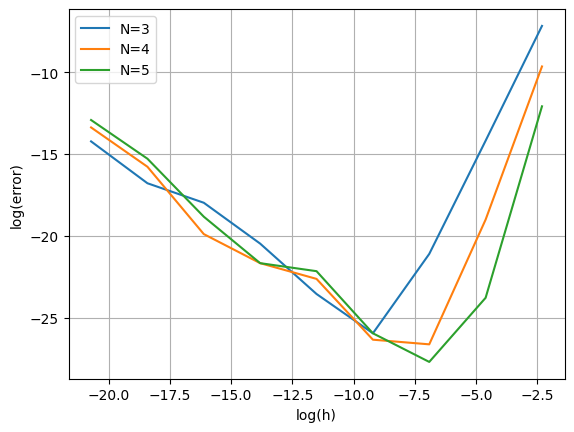

In [112]:
plt.plot(np.log(h_list), np.log(result[3]), label='N=3')
plt.plot(np.log(h_list), np.log(result[4]), label='N=4')
plt.plot(np.log(h_list), np.log(result[5]), label='N=5')

plt.legend(loc='upper left')

plt.xlabel("log(h)")
plt.ylabel("log(error)")

plt.grid(True)

plt.show()
